In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install sklearn-lmer

In [3]:
#pip uninstall sklearn

In [4]:
#pip uninstall scikit-learn

In [5]:
#pip install sklearn-lmer

In [179]:
# pip install pydot

In [178]:
import os

import numpy as np

import pandas as pd
from pandas.plotting import table

import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [7]:
os.chdir('C:\\Users\\marky\\OneDrive\\Documents\\Data Science\\KPMG Internship\\')
os.getcwd()

'C:\\Users\\marky\\OneDrive\\Documents\\Data Science\\KPMG Internship'

In [8]:
os.listdir()

['.ipynb_checkpoints',
 'Average Monthly Profits per Transaction by Wealth.png',
 'Average Profit from Transaction by Month.png',
 'Bike Related Purchases Past 3 Years.png',
 'Customer Profit Predictor',
 'Customers by Wealth by Birth Year.png',
 'customer_address.csv',
 'customer_demographic.csv',
 'customer_demographic_address_profits.csv',
 'Customer_Profit_Predictor',
 'Evaluation Scores.png',
 'Feature Importance Scores.png',
 'Monthly Profits by Wealth.png',
 'New Customers by Birth Year.png',
 'New Customers by Wealth by Birth Year.png',
 'new_customer_list',
 'new_customer_list.csv',
 'predicted profits customer list.csv',
 'Property Values.png',
 'Sprocket Central Analysis - KPMG Virtual Internship.ipynb',
 'Sprocket Central Data - KPMG.xlsx',
 'Total Profit from Transactions by Month.png',
 'Transactions by Month.png',
 'Transactions by Wealth by Month.png',
 'transactions.csv']

In [9]:
transactions=pd.read_excel('Sprocket Central Data - KPMG.xlsx',sheet_name='Transactions',skiprows=1)
transactions.to_csv('transactions.csv')

In [10]:
transactions['product_profit']=(transactions['list_price']-transactions['standard_cost'])

In [11]:
transactions.head(15)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,product_profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031.0,709.34
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,15.08
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,39915.0,1279.40
8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,33455.0,690.49
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0,1069.55


In [12]:
transactions.shape

(20000, 14)

In [13]:
customer_profits=pd.DataFrame(transactions.groupby(['customer_id'])['product_profit'].sum())
customer_profits=customer_profits.rename(columns={"product_profit": "3_year_product_profit"})
customer_profits

,3_year_product_profit
customer_id,
1,3018.090000
2,2226.260000
3,3362.810000
4,220.570000
5,2394.940000
...,...
3497,1648.320000
3498,3147.330000
3499,4955.250000


In [14]:
transactions.count()

transaction_id             20000
product_id                 20000
customer_id                20000
transaction_date           20000
online_order               19640
order_status               20000
brand                      19803
product_line               19803
product_class              19803
product_size               19803
list_price                 20000
standard_cost              19803
product_first_sold_date    19803
product_profit             19803
dtype: int64

In [15]:
transactions.count().sum() / (transactions.shape[0] * transactions.shape[1])

0.9937892857142857

In [16]:
transactions['online_order']=transactions['online_order'].fillna(0.0)

In [17]:
transactions.count()

transaction_id             20000
product_id                 20000
customer_id                20000
transaction_date           20000
online_order               20000
order_status               20000
brand                      19803
product_line               19803
product_class              19803
product_size               19803
list_price                 20000
standard_cost              19803
product_first_sold_date    19803
product_profit             19803
dtype: int64

In [18]:
transactions=transactions.dropna()

In [19]:
transactions.count()

transaction_id             19803
product_id                 19803
customer_id                19803
transaction_date           19803
online_order               19803
order_status               19803
brand                      19803
product_line               19803
product_class              19803
product_size               19803
list_price                 19803
standard_cost              19803
product_first_sold_date    19803
product_profit             19803
dtype: int64

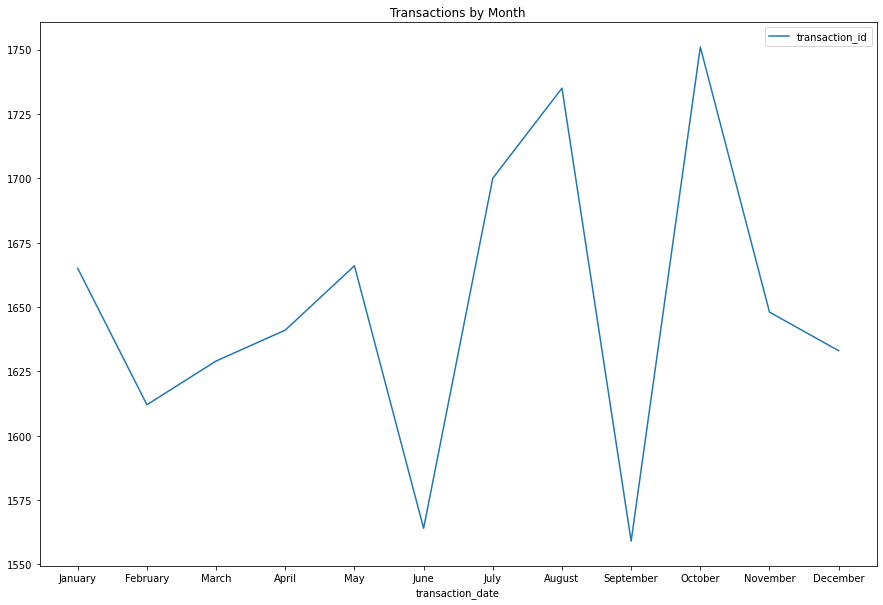

In [20]:
monthly_transactions=transactions.set_index('transaction_date')['transaction_id'].resample('M').nunique()
monthly_transactions.index=monthly_transactions.index.strftime('%B')
monthly_transactions=pd.DataFrame(monthly_transactions)
monthly_transactions_plot=monthly_transactions.plot(xticks=range(len(monthly_transactions)),figsize=(15,10)).set_title('Transactions by Month');

In [21]:
monthly_transactions

,transaction_id
transaction_date,
January,1665
February,1612
March,1629
April,1641
May,1666
June,1564
July,1700
August,1735
September,1559


In [22]:
monthly_transactions.T

transaction_date,January,February,March,April,May,June,July,August,September,October,November,December
transaction_id,1665,1612,1629,1641,1666,1564,1700,1735,1559,1751,1648,1633


In [23]:
# Merge transactions with customers_list by 'customer_id'


In [24]:
# Create above graph by wealth segment

In [25]:
monthly_transactions_plot.figure.savefig('Transactions by Month.png')

In [26]:
transactions_value_counts=[pd.DataFrame(transactions[transactions.columns[i]].value_counts()).T for i in range(len(transactions.columns))]
transactions_value_counts

[                2047   19084  8833   14978  12931  2692   645    6790   4743   \
 transaction_id      1      1      1      1      1      1      1      1      1   
 
                 17037  ...  3371   13612  15661  9518   11567  17714  19763  \
 transaction_id      1  ...      1      1      1      1      1      1      1   
 
                 5432   7481   2049   
 transaction_id      1      1      1  
 
 [1 rows x 19803 columns],
              0    3    1    35   38   4    2    90   12   80   ...  97   24   \
 product_id  1181  354  311  268  267  241  240  225  224  223  ...  142  141   
 
             73   44   75   71   8    16   100  47   
 product_id  139  138  138  137  136  136  130  121  
 
 [1 rows x 101 columns],
              1068  2183  2476  2548  1913  2912  3232  2072  3048  1129  ...  \
 customer_id    14    14    14    13    13    13    13    13    13    13  ...   
 
              3161  1448  2291  2532  1544  373   2876  2328  1921  3279  
 customer_id     1     1   

In [27]:
new_customer_list=pd.read_excel('Sprocket Central Data - KPMG.xlsx',sheet_name='NewCustomerList',skiprows=1).reset_index()
new_customer_list.to_csv('new_customer_list.csv')
new_customer_list.head()

,index,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [28]:
transactions.loc[transactions['product_id']==0]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,product_profit
34,35,0,2171,2017-08-20,0.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0,167.21
39,40,0,2448,2017-11-28,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0,167.21
54,55,0,3140,2017-09-18,0.0,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0,72.60
60,61,0,1839,2017-02-24,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,34244.0,4.80
63,64,0,2000,2017-07-08,0.0,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,39031.0,110.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19921,19922,0,1869,2017-01-06,1.0,Approved,Norco Bicycles,Road,medium,medium,543.39,407.54,37698.0,135.85
19941,19942,0,966,2017-07-30,1.0,Approved,OHM Cycles,Standard,low,medium,71.16,56.93,38647.0,14.23
19967,19968,0,2751,2017-04-06,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,15.08
19987,19988,0,13,2017-04-05,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,42105.0,167.21


In [29]:
new_customer_list.shape

(1000, 24)

In [30]:
new_customer_list.count()

index                                  1000
first_name                             1000
last_name                               971
gender                                 1000
past_3_years_bike_related_purchases    1000
DOB                                     983
job_title                               894
job_industry_category                   835
wealth_segment                         1000
deceased_indicator                     1000
owns_car                               1000
tenure                                 1000
address                                1000
postcode                               1000
state                                  1000
country                                1000
property_valuation                     1000
Unnamed: 16                            1000
Unnamed: 17                            1000
Unnamed: 18                            1000
Unnamed: 19                            1000
Unnamed: 20                            1000
Rank                            

In [31]:
# Number of complete columns
len((new_customer_list.columns[~new_customer_list.isna().any()])) / len(new_customer_list.columns)

0.8333333333333334

In [32]:
# Complete data in 'DOB column'
new_customer_list['DOB'].count() / len(new_customer_list)

0.983

In [33]:
# Overall data that is complete
new_customer_list.count().sum() / (new_customer_list.shape[0] * new_customer_list.shape[1])

0.9867916666666666

In [34]:
new_customer_list[new_customer_list.duplicated(['first_name','last_name'])]

,index,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value


In [35]:
new_customer_list.dropna(subset=['DOB'],inplace=True)

In [36]:
new_customer_list=new_customer_list.fillna('N/A')

In [37]:
new_customer_list.count()

index                                  983
first_name                             983
last_name                              983
gender                                 983
past_3_years_bike_related_purchases    983
DOB                                    983
job_title                              983
job_industry_category                  983
wealth_segment                         983
deceased_indicator                     983
owns_car                               983
tenure                                 983
address                                983
postcode                               983
state                                  983
country                                983
property_valuation                     983
Unnamed: 16                            983
Unnamed: 17                            983
Unnamed: 18                            983
Unnamed: 19                            983
Unnamed: 20                            983
Rank                                   983
Value      

In [38]:
new_customer_list.describe()

,index,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,983.000000,983.000000,983.000000,983.00000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,498.431333,49.824008,11.459817,3017.74059,7.406918,0.746399,0.838222,0.942255,0.870194,497.745677,497.745677,0.882926
std,289.197645,27.786108,5.006123,849.38176,2.758293,0.205207,0.249030,0.294791,0.280881,289.186799,289.186799,0.294166
min,0.000000,0.000000,1.000000,2000.00000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,247.500000,27.000000,8.000000,2209.00000,6.000000,0.570000,0.630000,0.712500,0.659375,248.500000,248.500000,0.650781
50%,499.000000,51.000000,11.000000,2795.00000,8.000000,0.750000,0.820000,0.912500,0.841500,500.000000,500.000000,0.860000
75%,747.500000,72.000000,15.000000,3850.50000,9.000000,0.920000,1.030000,1.140625,1.062500,748.000000,748.000000,1.076953
max,999.000000,99.000000,22.000000,4879.00000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


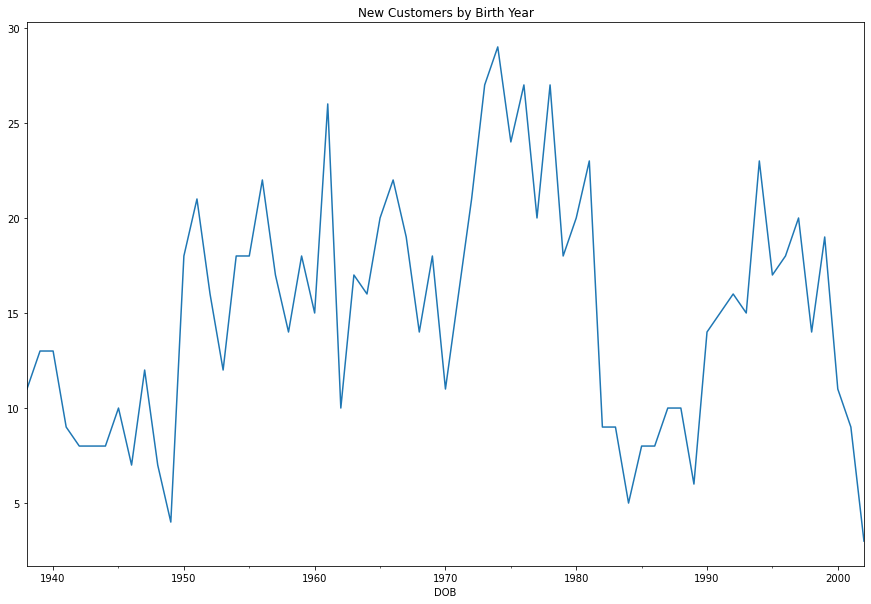

In [39]:
new_customer_by_year=new_customer_list.set_index('DOB')['index'].resample('Y').nunique()
new_customer_by_year_plot=new_customer_by_year.plot(figsize=(15,10)).set_title('New Customers by Birth Year')
new_customer_by_year_plot;

In [40]:
new_customer_by_year_plot.figure.savefig('New Customers by Birth Year.png')

In [41]:
new_customer_by_year

DOB
1938-12-31    11
1939-12-31    13
1940-12-31    13
1941-12-31     9
1942-12-31     8
              ..
1998-12-31    14
1999-12-31    19
2000-12-31    11
2001-12-31     9
2002-12-31     3
Freq: A-DEC, Name: index, Length: 65, dtype: int64

In [42]:
new_customer_dummies=pd.get_dummies(new_customer_list[['wealth_segment']])
new_customer_list_dummies=pd.concat([new_customer_list['DOB'],new_customer_dummies],axis=1)
new_customer_by_year_by_wealth=new_customer_list_dummies.groupby(new_customer_list_dummies.set_index('DOB').index.year).sum()

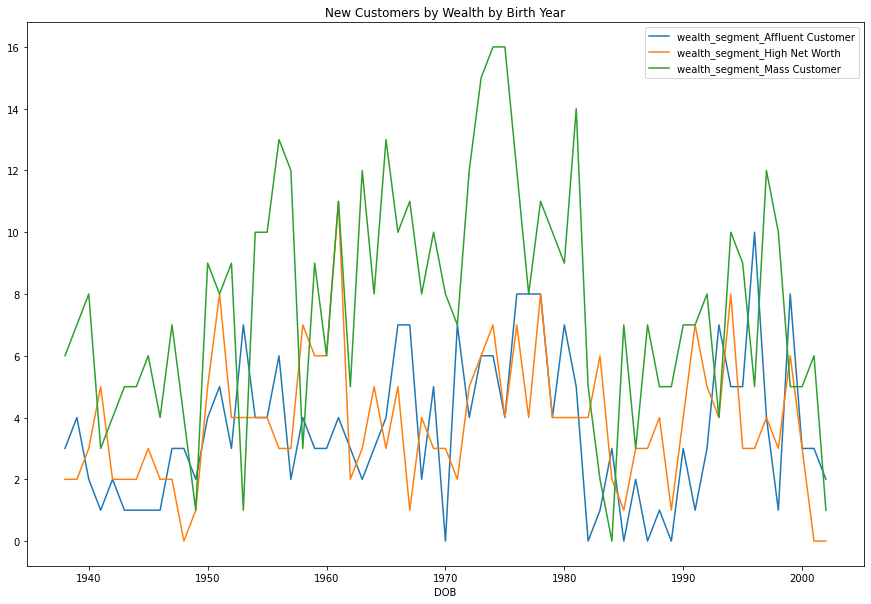

In [43]:
new_customer_by_year_by_wealth_plot=new_customer_by_year_by_wealth.plot(figsize=(15,10)).set_title('New Customers by Wealth by Birth Year')
new_customer_by_year_by_wealth_plot;

In [44]:
new_customer_by_year_by_wealth_plot.figure.savefig('New Customers by Wealth by Birth Year.png')

In [45]:
new_customer_by_year_by_wealth.head()

,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
DOB,,,
1938,3,2,6
1939,4,2,7
1940,2,3,8
1941,1,5,3
1942,2,2,4


In [46]:
new_customer_value_counts=[pd.DataFrame(new_customer_list[new_customer_list.columns[i]].value_counts()).T for i in range(len(new_customer_list.columns))]
new_customer_value_counts

[       999  339  337  336  335  334  333  332  331  330  ...  666  665  663  \
 index    1    1    1    1    1    1    1    1    1    1  ...    1    1    1   
 
        662  661  660  659  658  657  0    
 index    1    1    1    1    1    1    1  
 
 [1 rows x 983 columns],
             Dorian  Mandie  Latrena  Morganica  Aloysius  Arty  Bartram  \
 first_name       3       3        2          2         2     2        2   
 
             Jenelle  Laurie  Anthony  ...  Maury  Mavra  Quillan  Sid  \
 first_name        2       2        2  ...      1      1        1    1   
 
             Harland  Davidde  Claude  Audry  Heall  Egor  
 first_name        1        1       1      1      1     1  
 
 [1 rows x 925 columns],
            N/A  Eade  Crellim  Minshall  Hallt  Sturch  Borsi  Sissel  \
 last_name   29     2        2         2      2       2      2       2   
 
            Burgoine  Van den Velde  ...  Clemonts  Hencke  Dowyer  Spratling  \
 last_name         2              2  ... 

In [47]:
customer_demographic=pd.read_excel('Sprocket Central Data - KPMG.xlsx',sheet_name='CustomerDemographic',skiprows=1)
customer_demographic.to_csv('customer_demographic.csv') # Remove extra column created
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [48]:
customer_demographic.shape

(4000, 13)

In [49]:
customer_demographic.count()

customer_id                            4000
first_name                             4000
last_name                              3875
gender                                 4000
past_3_years_bike_related_purchases    4000
DOB                                    3913
job_title                              3494
job_industry_category                  3344
wealth_segment                         4000
deceased_indicator                     4000
default                                3698
owns_car                               4000
tenure                                 3913
dtype: int64

In [50]:
# Default has missing values, but it seems to be a irrelevant column either way

In [51]:
# How many rows are completely filled
customer_demographic_complete_rows_count=len(customer_demographic.columns[customer_demographic.count() == customer_demographic.shape[0]])
customer_demographic_complete_rows_count / len(customer_demographic.count())

0.5384615384615384

In [52]:
# How much overall data is filled
customer_demographic.count().sum() / (customer_demographic.shape[0] * customer_demographic.shape[1])

0.9660961538461539

In [53]:
customer_demographic.drop(columns='default',inplace=True)

In [54]:
customer_demographic.dropna(subset=['DOB'],inplace=True)

In [55]:
customer_demographic[(customer_demographic.DOB.dt.year < 1900)]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0


In [56]:
customer_demographic=customer_demographic.fillna('N/A').drop(33).reset_index(drop=True)

In [57]:
customer_demographic.count()

customer_id                            3912
first_name                             3912
last_name                              3912
gender                                 3912
past_3_years_bike_related_purchases    3912
DOB                                    3912
job_title                              3912
job_industry_category                  3912
wealth_segment                         3912
deceased_indicator                     3912
owns_car                               3912
tenure                                 3912
dtype: int64

In [58]:
customer_demographic[customer_demographic.duplicated(['first_name','last_name'])]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1864,1905,Corabelle,N/A,Female,21,1953-09-17,Help Desk Technician,Manufacturing,Affluent Customer,N,No,15.0


In [59]:
customer_demographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,3912.000000,3912.000000,3912.000000
mean,1999.828221,49.039366,10.654652
std,1154.903377,28.768226,5.658898
min,1.000000,0.000000,1.000000
25%,1002.750000,24.000000,6.000000
50%,2000.000000,48.000000,11.000000
75%,2997.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


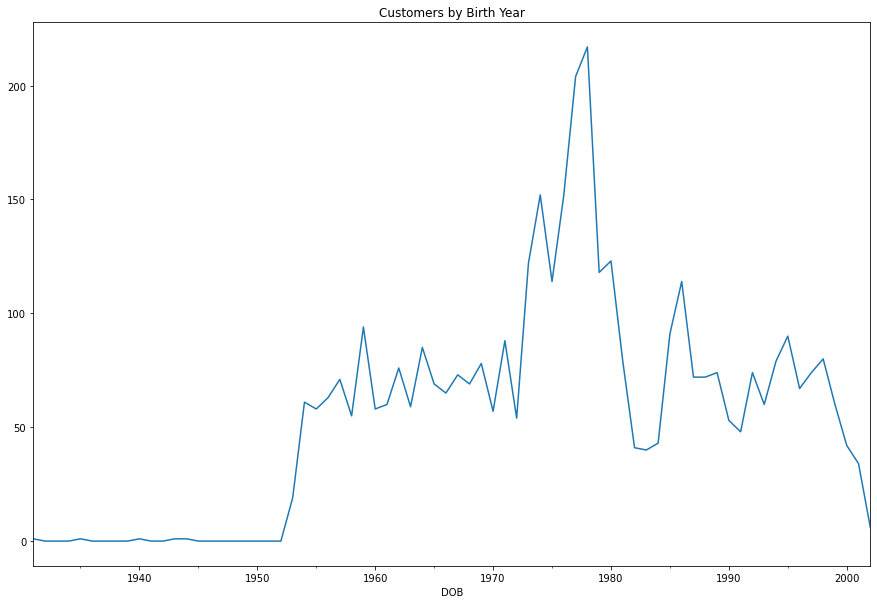

In [60]:
yearly_customer_demographic=customer_demographic.set_index('DOB')['customer_id'].resample('Y').nunique()
yearly_customer_demographic.plot(figsize=(15,10)).set_title('Customers by Birth Year');

In [61]:
# There seems to be an outlier in our customer date range, otherwise the data looks good

In [62]:
yearly_customer_demographic.head()

DOB
1931-12-31    1
1932-12-31    0
1933-12-31    0
1934-12-31    0
1935-12-31    1
Freq: A-DEC, Name: customer_id, dtype: int64

In [63]:
customer_demographic['DOB']

0      1953-10-12
1      1980-12-16
2      1954-01-20
3      1961-10-03
4      1977-05-13
          ...    
3907   1975-12-12
3908   1975-08-09
3909   2001-07-13
3910   1973-10-24
3911   1991-11-05
Name: DOB, Length: 3912, dtype: datetime64[ns]

In [64]:
#customer_list_dummies.groupby(customer_list_dummies.set_index('DOB').index.year).sum()

In [65]:
customer_dummies=pd.get_dummies(customer_demographic[['wealth_segment']])
customer_list_dummies=pd.concat([customer_demographic['DOB'],customer_dummies],axis=1).dropna()
customer_by_year_by_wealth=customer_list_dummies.groupby(customer_list_dummies.set_index('DOB').index.year).sum()

In [66]:
customer_by_year_by_wealth.head()

,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
DOB,,,
1931,1,0,0
1935,0,0,1
1940,0,0,1
1943,0,1,0
1944,1,0,0


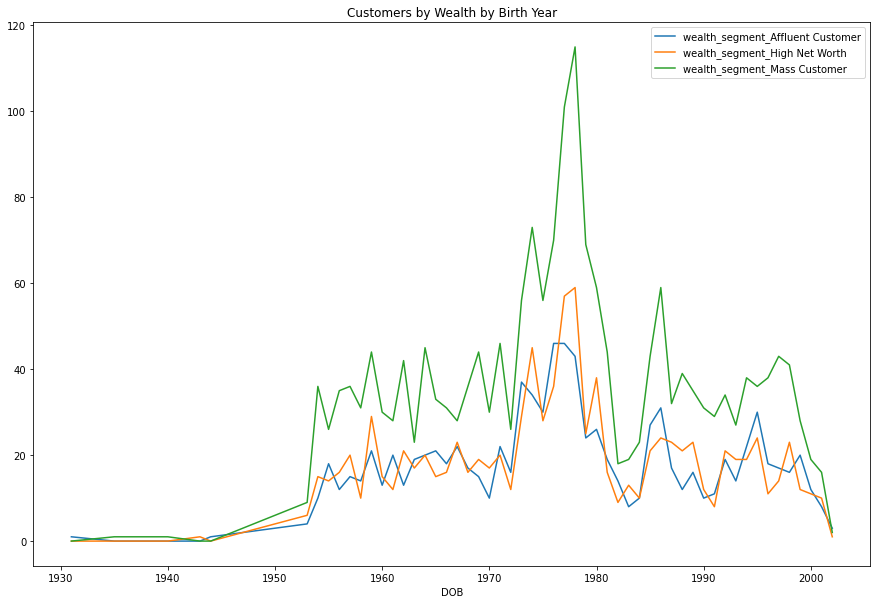

In [184]:
customer_by_year_by_wealth_plot=customer_by_year_by_wealth.plot(figsize=(15,10)).set_title('Customers by Wealth by Birth Year');

In [68]:
customer_by_year_by_wealth_plot.figure.savefig('Customers by Wealth by Birth Year.png')

In [69]:
customer_demographic_value_counts=[pd.DataFrame(customer_demographic[customer_demographic.columns[i]].value_counts()).T for i in range(len(customer_demographic.columns))]
customer_demographic_value_counts

[             2047  2732  2728  677   2724  673   2720  669   2716  665   ...  \
 customer_id     1     1     1     1     1     1     1     1     1     1  ...   
 
              1330  3375  1326  3371  1322  3367  1318  3363  1314  2049  
 customer_id     1     1     1     1     1     1     1     1     1     1  
 
 [1 rows x 3912 columns],
             Timmie  Max  Tobe  Kippy  Pail  Urbanus  Corabelle  Emlyn  Osgood  \
 first_name       5    5     5      4     4        4          4      4       4   
 
             Lindsay  ...  Leonora  Nevin  Orrin  Kimbra  Cathrin  Ave  \
 first_name        4  ...        1      1      1       1        1    1   
 
             Chantal  Temp  Evangelina  Karlen  
 first_name        1     1           1       1  
 
 [1 rows x 3078 columns],
            N/A  Pristnor  Ramsdell  Lithgow  Markel  O'Halloran  Wickey  \
 last_name  121         3         3        2       2           2       2   
 
            Cliff  Dumphy  Crack  ...  MacGragh  Clamp  Handes

In [70]:
# Format 'Gender' column for customer demographics
customer_demographic[['gender']]=customer_demographic[['gender']].replace(['Femal','F'],'Female').replace(['M'],'Male')

In [71]:
customer_demographic['gender'].value_counts()

Female    2039
Male      1873
Name: gender, dtype: int64

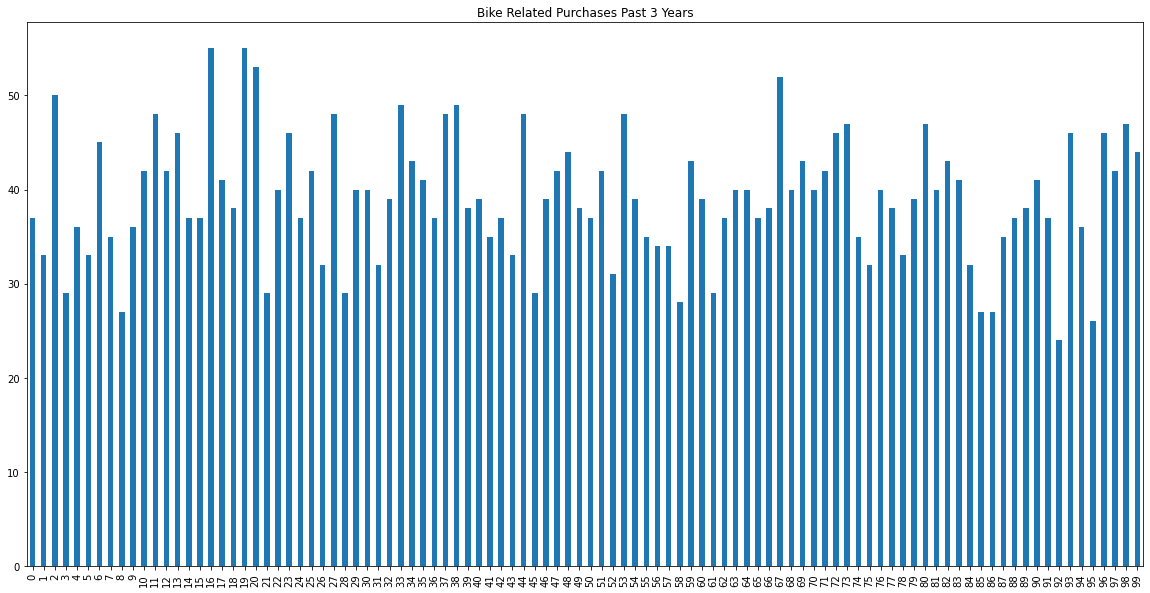

In [72]:
past_3_year_purchases=customer_demographic['past_3_years_bike_related_purchases'].value_counts().sort_index().plot.bar(figsize=(20,10)).set_title('Bike Related Purchases Past 3 Years')
past_3_year_purchases;

In [73]:
past_3_year_purchases.figure.savefig('Bike Related Purchases Past 3 Years.png')

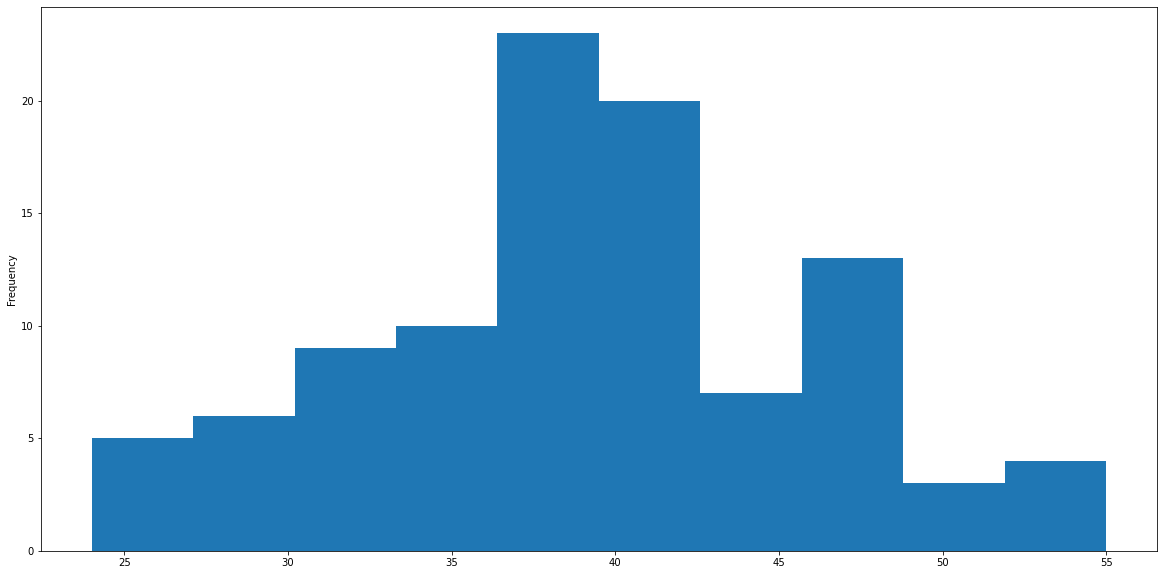

In [74]:
customer_demographic['past_3_years_bike_related_purchases'].value_counts().sort_index().plot.hist(figsize=(20,10));

In [75]:
customer_demographic.count()

customer_id                            3912
first_name                             3912
last_name                              3912
gender                                 3912
past_3_years_bike_related_purchases    3912
DOB                                    3912
job_title                              3912
job_industry_category                  3912
wealth_segment                         3912
deceased_indicator                     3912
owns_car                               3912
tenure                                 3912
dtype: int64

In [76]:
customer_address=pd.read_excel('Sprocket Central Data - KPMG.xlsx',sheet_name='CustomerAddress',skiprows=1)
customer_address.to_csv('customer_address.csv') # Remove extra column created
customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [77]:
customer_address[customer_address.duplicated(['address'])]

,customer_id,address,postcode,state,country,property_valuation
2470,2475,3 Talisman Place,4017,QLD,Australia,5
2980,2985,3 Mariners Cove Terrace,2216,NSW,Australia,10
3535,3540,64 Macpherson Junction,4061,QLD,Australia,8


In [78]:
customer_address.shape
# Mismatch between customer demographic (4000) and customer address (3999) means that we will delete the last row in customer demographic to smooth the merge

(3999, 6)

In [79]:
customer_address.count()

customer_id           3999
address               3999
postcode              3999
state                 3999
country               3999
property_valuation    3999
dtype: int64

In [80]:
len(customer_address.all())

6

In [81]:
# Not missing any rows (except for the last one)

In [82]:
customer_address.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


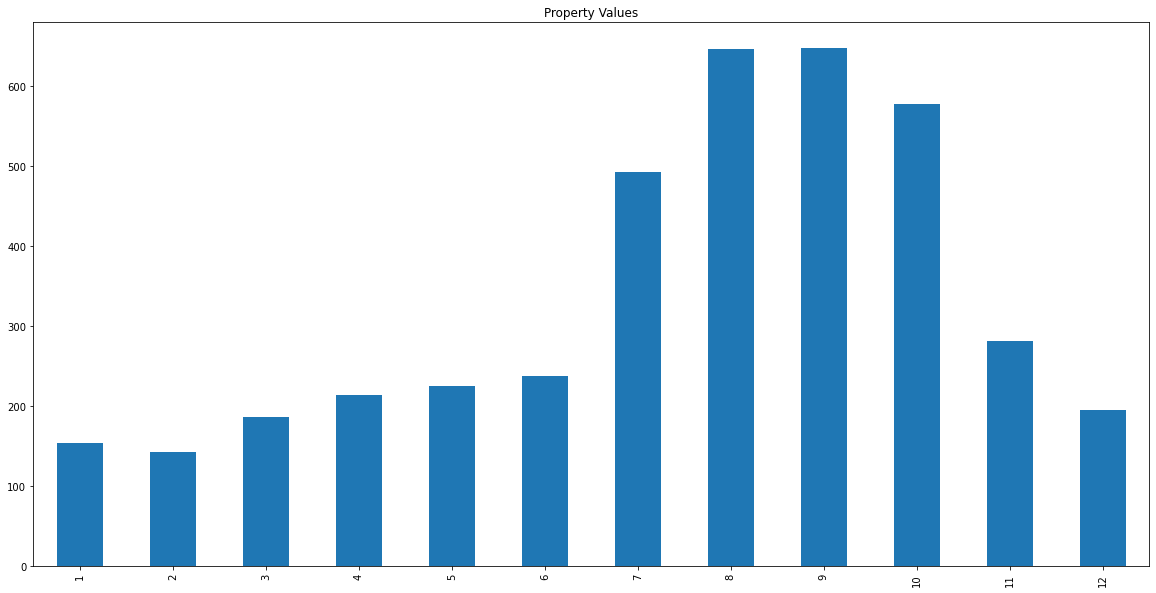

In [83]:
propery_values=customer_address['property_valuation'].value_counts().sort_index().plot.bar(figsize=(20,10)).set_title('Property Values')
propery_values;

In [84]:
propery_values.figure.savefig('Property Values.png')

In [85]:
customer_address_value_counts=[pd.DataFrame(customer_address[customer_address.columns[i]].value_counts()).T for i in range(len(customer_address.columns))]
customer_address_value_counts

[             2047  653   2728  677   2724  673   2720  669   2716  665   ...  \
 customer_id     1     1     1     1     1     1     1     1     1     1  ...   
 
              1334  3379  1330  3375  1326  3371  1322  3367  1318  2049  
 customer_id     1     1     1     1     1     1     1     1     1     1  
 
 [1 rows x 3999 columns],
          3 Mariners Cove Terrace  64 Macpherson Junction  3 Talisman Place  \
 address                        2                       2                 2   
 
          7 Scoville Trail  37 Summerview Park  5699 Forster Street  \
 address                 1                   1                    1   
 
          937 Sloan Center  7343 Washington Road  7 Laurel Junction  \
 address                 1                     1                  1   
 
          6236 Summerview Terrace  ...  2 Vidon Center  682 Sheridan Avenue  \
 address                        1  ...               1                    1   
 
          01 Weeping Birch Plaza  8 Boyd Road  535

In [86]:
# 'Country' needs to be reformatted as well

In [87]:
customer_address[['state']]=customer_address[['state']].replace('New South Wales','NSW').replace('Victoria','VIC')

In [88]:
customer_address['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [89]:
customer_profits

,3_year_product_profit
customer_id,
1,3018.090000
2,2226.260000
3,3362.810000
4,220.570000
5,2394.940000
...,...
3497,1648.320000
3498,3147.330000
3499,4955.250000


In [90]:
customer_demographic.count()

customer_id                            3912
first_name                             3912
last_name                              3912
gender                                 3912
past_3_years_bike_related_purchases    3912
DOB                                    3912
job_title                              3912
job_industry_category                  3912
wealth_segment                         3912
deceased_indicator                     3912
owns_car                               3912
tenure                                 3912
dtype: int64

In [91]:
# Joining data for customers that have transaction history (4000 --> 3494)
customer_demographic_address=pd.merge(left=customer_demographic,right=customer_address,left_on='customer_id',right_on='customer_id')
now = pd.to_datetime('now')
customer_demographic_address['age']=(now - customer_demographic_address['DOB']).astype('<m8[Y]')
customer_demographic_address

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,66.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,39.0
2,4,Talbot,N/A,Male,33,1961-10-03,N/A,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,58.0
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,N/A,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4,43.0
4,6,Curr,Duckhouse,Male,35,1966-09-16,N/A,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3903,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0,613 Erie Lane,2088,NSW,Australia,12,44.0
3904,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,0 Transport Center,3977,VIC,Australia,6,44.0
3905,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,4 Dovetail Crossing,2350,NSW,Australia,2,18.0
3906,3999,Patrizius,N/A,Male,11,1973-10-24,N/A,Manufacturing,Affluent Customer,N,Yes,10.0,1482 Hauk Trail,3064,VIC,Australia,3,46.0


In [92]:
customer_demographic_address.count()

customer_id                            3908
first_name                             3908
last_name                              3908
gender                                 3908
past_3_years_bike_related_purchases    3908
DOB                                    3908
job_title                              3908
job_industry_category                  3908
wealth_segment                         3908
deceased_indicator                     3908
owns_car                               3908
tenure                                 3908
address                                3908
postcode                               3908
state                                  3908
country                                3908
property_valuation                     3908
age                                    3908
dtype: int64

In [93]:
customer_demographic_address_profits=pd.merge(left=customer_demographic_address,right=customer_profits,left_on='customer_id',right_on='customer_id')
customer_demographic_address_profits

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age,3_year_product_profit
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,66.0,3018.09
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,39.0,2226.26
2,4,Talbot,N/A,Male,33,1961-10-03,N/A,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,58.0,220.57
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,N/A,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4,43.0,2394.94
4,6,Curr,Duckhouse,Male,35,1966-09-16,N/A,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,53.0,3946.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,Yes,19.0,2565 Caliangt Point,2171,NSW,Australia,9,34.0,2045.84
3408,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,Yes,18.0,96 Delladonna Trail,3976,VIC,Australia,5,34.0,1648.32
3409,3498,Lois,Abrahim,Female,28,1995-11-02,N/A,Manufacturing,Mass Customer,N,No,5.0,3 Nova Point,3012,VIC,Australia,4,24.0,3147.33
3410,3499,Shelton,Tewkesberrie,Male,29,1979-06-17,N/A,Manufacturing,Mass Customer,N,Yes,7.0,310 Stephen Terrace,4073,QLD,Australia,9,40.0,4955.25


In [94]:
customer_demographic_address_profits[customer_demographic_address_profits['deceased_indicator'] == 'Y']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age,3_year_product_profit
732,753,Josy,St. Quentin,Female,82,1970-03-07,Food Chemist,Health,Affluent Customer,Y,Yes,6.0,37 Dorton Street,2594,NSW,Australia,3,50.0,7727.17


In [95]:
customer_demographic_address_profits.count()

customer_id                            3412
first_name                             3412
last_name                              3412
gender                                 3412
past_3_years_bike_related_purchases    3412
DOB                                    3412
job_title                              3412
job_industry_category                  3412
wealth_segment                         3412
deceased_indicator                     3412
owns_car                               3412
tenure                                 3412
address                                3412
postcode                               3412
state                                  3412
country                                3412
property_valuation                     3412
age                                    3412
3_year_product_profit                  3412
dtype: int64

In [96]:
# Drop deceased customer and 'deceased_indicator' column
customer_demographic_address_profits_clean=customer_demographic_address_profits.drop(733).drop(columns=['job_title','DOB','first_name','last_name','customer_id','deceased_indicator','address','postcode','country']).reset_index(drop=True)
customer_demographic_address_profits_clean.to_csv('customer_demographic_address_profits.csv')
customer_demographic_address_profits_clean

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age,3_year_product_profit
0,Female,93,Health,Mass Customer,Yes,11.0,NSW,10,66.0,3018.09
1,Male,81,Financial Services,Mass Customer,Yes,16.0,NSW,10,39.0,2226.26
2,Male,33,IT,Mass Customer,No,7.0,QLD,9,58.0,220.57
3,Female,56,N/A,Affluent Customer,Yes,8.0,NSW,4,43.0,2394.94
4,Male,35,Retail,High Net Worth,Yes,13.0,VIC,9,53.0,3946.55
...,...,...,...,...,...,...,...,...,...,...
3406,Male,99,Manufacturing,Mass Customer,Yes,19.0,NSW,9,34.0,2045.84
3407,Female,73,Manufacturing,Affluent Customer,Yes,18.0,VIC,5,34.0,1648.32
3408,Female,28,Manufacturing,Mass Customer,No,5.0,VIC,4,24.0,3147.33
3409,Male,29,Manufacturing,Mass Customer,Yes,7.0,QLD,9,40.0,4955.25


In [97]:
customer_demographic_address_profits_clean.count()

gender                                 3411
past_3_years_bike_related_purchases    3411
job_industry_category                  3411
wealth_segment                         3411
owns_car                               3411
tenure                                 3411
state                                  3411
property_valuation                     3411
age                                    3411
3_year_product_profit                  3411
dtype: int64

In [98]:
customer_demographic_address_profits_clean.fillna('N/A',inplace=True)
customer_demographic_address_profits_clean.count()

gender                                 3411
past_3_years_bike_related_purchases    3411
job_industry_category                  3411
wealth_segment                         3411
owns_car                               3411
tenure                                 3411
state                                  3411
property_valuation                     3411
age                                    3411
3_year_product_profit                  3411
dtype: int64

In [99]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,product_profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [100]:
# Transactions with customer information to graph a time series by 'wealth segment'
transactions_customers=pd.merge(left=transactions,right=customer_demographic_address_profits,left_on='customer_id',right_on='customer_id')
transactions_dummies=pd.get_dummies(transactions_customers[['wealth_segment']])
transactions_by_wealth_dummies=pd.concat([transactions_customers['transaction_date'],transactions_dummies],axis=1)

In [101]:
transactions_customers.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age,3_year_product_profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6,65.0,645.99
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6,65.0,645.99
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6,65.0,645.99
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5,41.0,4179.11
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5,41.0,4179.11


In [102]:
transactions_dummies.head()

,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


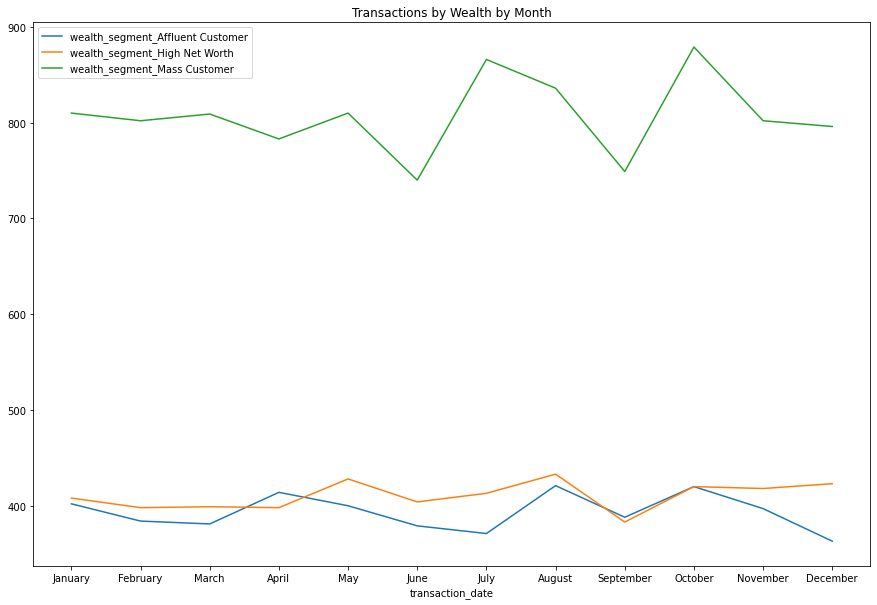

In [103]:
monthly_transactions_by_wealth_dummies=transactions_by_wealth_dummies.set_index('transaction_date')[['wealth_segment_Affluent Customer','wealth_segment_High Net Worth','wealth_segment_Mass Customer']].resample('M').sum()
monthly_transactions_by_wealth_dummies.index=monthly_transactions_by_wealth_dummies.index.strftime('%B')
monthly_transactions_by_wealth_dummies_plot=monthly_transactions_by_wealth_dummies.plot(xticks=range(len(monthly_transactions_by_wealth_dummies)),figsize=(15,10)).set_title('Transactions by Wealth by Month');

In [104]:
monthly_transactions_by_wealth_dummies_plot.figure.savefig('Transactions by Wealth by Month.png')

In [105]:
transactions.set_index('transaction_date')['product_profit'].resample('M').sum().rename('monthly_product_profit')

transaction_date
2017-01-31    929487.739988
2017-02-28    870819.060000
2017-03-31    879243.400000
2017-04-30    904691.310000
2017-05-31    913742.610000
2017-06-30    859571.550000
2017-07-31    938619.290000
2017-08-31    970452.520000
2017-09-30    862290.490000
2017-10-31    984973.464984
2017-11-30    924938.460000
2017-12-31    891454.070000
Freq: M, Name: monthly_product_profit, dtype: float64

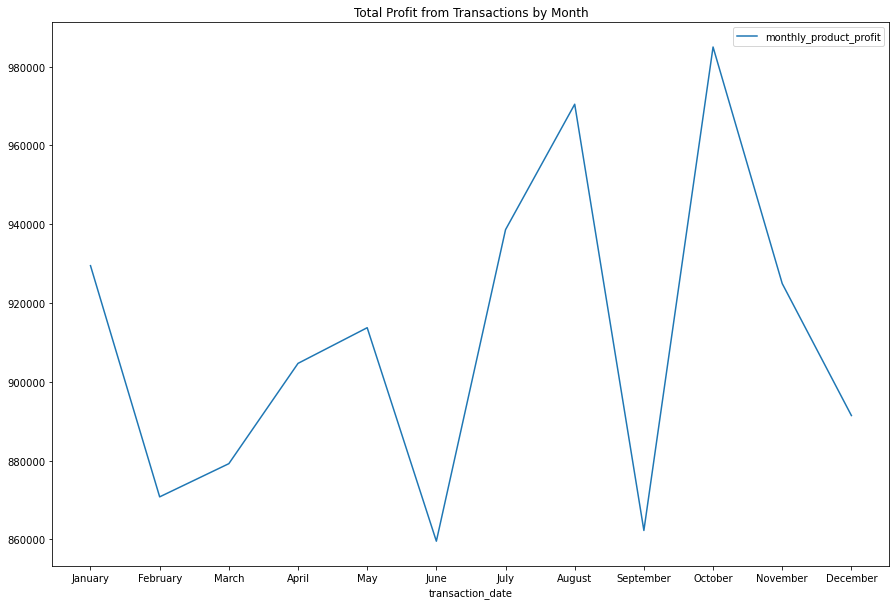

In [106]:
monthly_profits=transactions.set_index('transaction_date')['product_profit'].resample('M').sum().rename('monthly_product_profit')
monthly_profits.index=monthly_profits.index.strftime('%B')
monthly_profits=pd.DataFrame(monthly_profits)
monthly_profits_plot=monthly_profits.plot(xticks=range(len(monthly_profits)),figsize=(15,10)).set_title('Total Profit from Transactions by Month');

In [107]:
monthly_profits.T

transaction_date,January,February,March,April,May,June,July,August,September,October,November,December
monthly_product_profit,929487.739988,870819.06,879243.4,904691.31,913742.61,859571.55,938619.29,970452.52,862290.49,984973.464984,924938.46,891454.07


In [108]:
monthly_profits_plot.figure.savefig('Total Profit from Transactions by Month.png')

In [109]:
transactions_profits_by_wealth_dummies=pd.concat([transactions_customers[['customer_id','transaction_date','product_profit']],transactions_dummies],axis=1)
transactions_profits_by_wealth_dummies

,customer_id,transaction_date,product_profit,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
0,2950,2017-02-25,17.87,0,0,1
1,2950,2017-10-16,448.68,0,0,1
2,2950,2017-04-26,179.44,0,0,1
3,3120,2017-05-21,1702.55,0,0,1
4,3120,2017-10-05,451.65,0,0,1
...,...,...,...,...,...,...
19322,3168,2017-02-21,356.50,1,0,0
19323,3168,2017-04-11,1408.91,1,0,0
19324,3168,2017-06-03,1702.55,1,0,0
19325,3168,2017-09-30,1702.55,1,0,0


In [110]:
transactions_profits_by_wealth=transactions_profits_by_wealth_dummies.iloc[:,3:].mul(transactions_profits_by_wealth_dummies['product_profit'],axis=0)
transactions_profits_by_wealth

,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
0,0.00,0.0,17.87
1,0.00,0.0,448.68
2,0.00,0.0,179.44
3,0.00,0.0,1702.55
4,0.00,0.0,451.65
...,...,...,...
19322,356.50,0.0,0.00
19323,1408.91,0.0,0.00
19324,1702.55,0.0,0.00
19325,1702.55,0.0,0.00


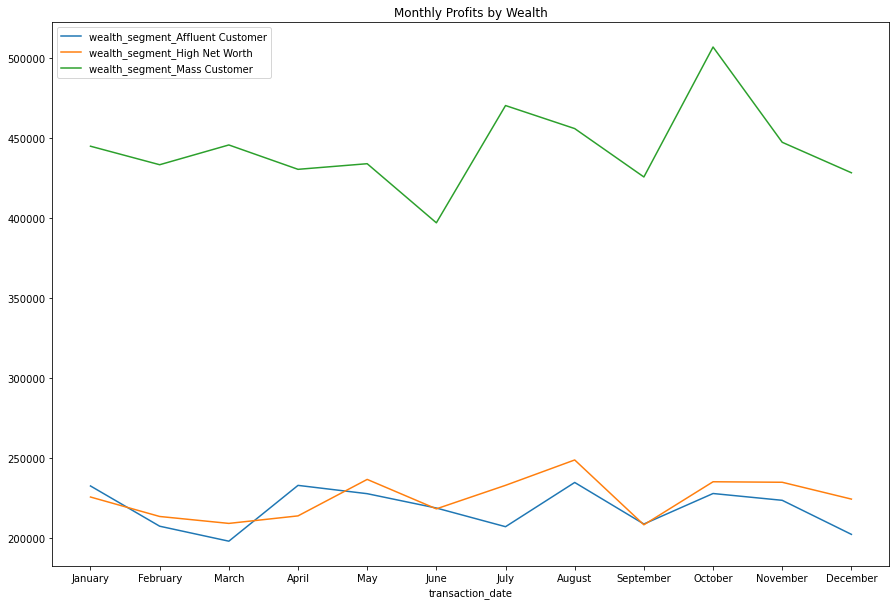

In [111]:
monthly_profits_by_wealth=pd.concat([transactions_customers[['transaction_date']],transactions_profits_by_wealth],axis=1).set_index('transaction_date').resample('M').sum()
monthly_profits_by_wealth.index=monthly_profits_by_wealth.index.strftime('%B')
monthly_profits_by_wealth_plot=monthly_profits_by_wealth.plot(xticks=range(len(monthly_profits_by_wealth)),figsize=(15,10)).set_title('Monthly Profits by Wealth');

In [112]:
monthly_profits_by_wealth

,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
transaction_date,,,
January,232576.66,225663.22,444878.07
February,207426.85,213509.19,433311.63
March,198068.16,209180.97,445664.70
April,232941.35,213876.29,430435.57
May,227750.91,236671.08,433945.47
June,218786.42,218273.79,397015.94
July,207121.95,232973.84,470291.80
August,234759.58,248822.71,455892.37
September,208794.40,208308.66,425659.42


In [113]:
monthly_profits_by_wealth_plot.figure.savefig('Monthly Profits by Wealth.png')

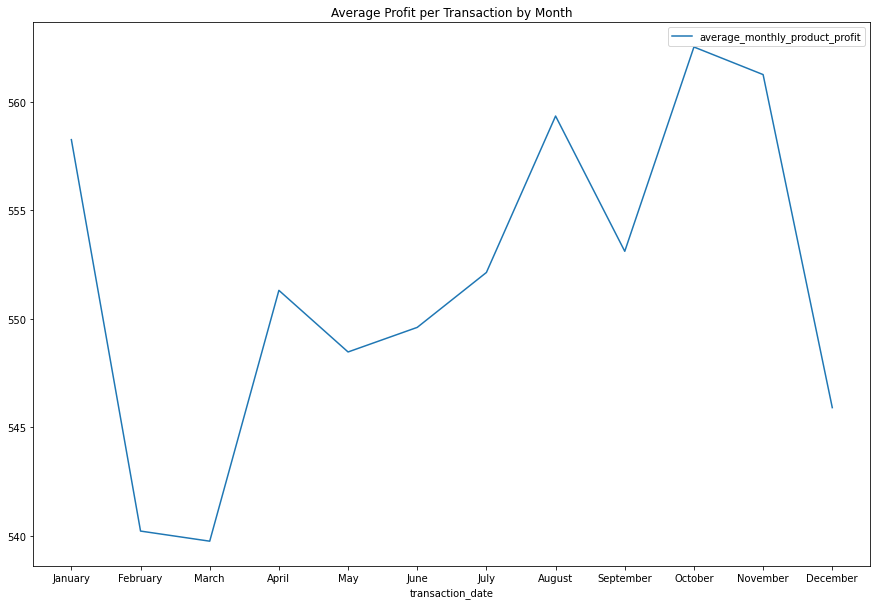

In [114]:
average_monthly_profits=transactions.set_index('transaction_date')['product_profit'].resample('M').mean().rename('average_monthly_product_profit')
average_monthly_profits.index=average_monthly_profits.index.strftime('%B')
average_monthly_profits=pd.DataFrame(average_monthly_profits)
average_monthly_profits_plot=average_monthly_profits.plot(xticks=range(len(average_monthly_profits)),figsize=(15,10)).set_title('Average Profit per Transaction by Month');

In [115]:
average_monthly_profits.T

transaction_date,January,February,March,April,May,June,July,August,September,October,November,December
average_monthly_product_profit,558.250895,540.210335,539.74426,551.304881,548.464952,549.598178,552.128994,559.338628,553.104869,562.52054,561.249066,545.899614


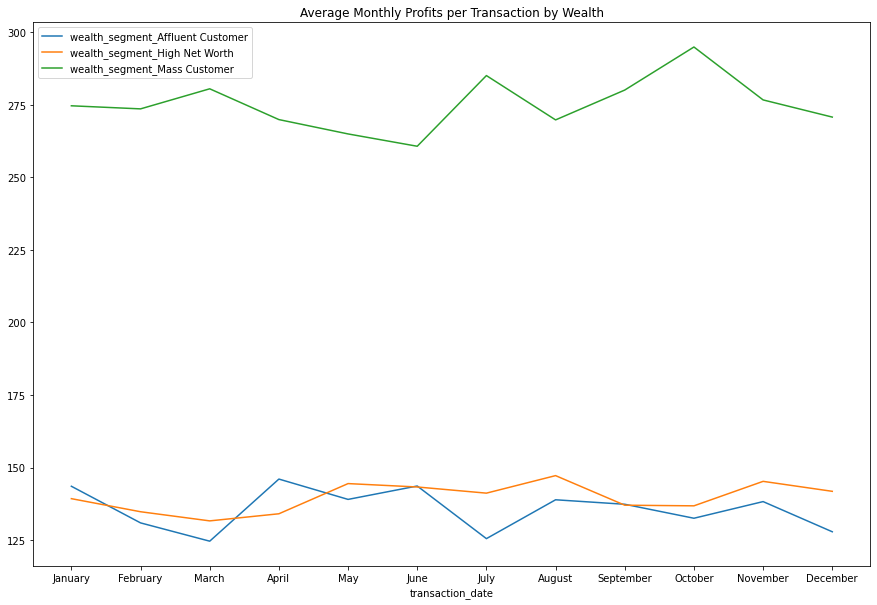

In [116]:
average_monthly_profits_by_wealth=pd.concat([transactions_customers[['transaction_date']],transactions_profits_by_wealth],axis=1).set_index('transaction_date').resample('M').mean()
average_monthly_profits_by_wealth.index=average_monthly_profits_by_wealth.index.strftime('%B')
average_monthly_profits_by_wealth_plot=average_monthly_profits_by_wealth.plot(xticks=range(len(average_monthly_profits_by_wealth)),figsize=(15,10)).set_title('Average Profit per Transaction by Wealth');

In [117]:
average_monthly_profits_by_wealth.T

transaction_date,January,February,March,April,May,June,July,August,September,October,November,December
wealth_segment_Affluent Customer,143.565840,130.951294,124.649566,146.044734,139.042070,143.654905,125.528455,138.910994,137.364737,132.550896,138.285510,127.893862
wealth_segment_High Net Worth,139.298284,134.791155,131.643153,134.091718,144.487839,143.318313,141.196267,147.232373,137.045171,136.825468,145.258287,141.824886
wealth_segment_Mass Customer,274.616093,273.555322,280.468660,269.865561,264.923974,260.680197,285.025333,269.758799,280.039092,294.866236,276.640649,270.726195


In [185]:
average_monthly_profits_by_wealth_plot.figure.savefig('Average Profit per Transaction by Wealth.png')

In [119]:
profit_table=pd.concat([monthly_profits,average_monthly_profits],axis=1)
profit_table

,monthly_product_profit,average_monthly_product_profit
transaction_date,,
January,929487.739988,558.250895
February,870819.060000,540.210335
March,879243.400000,539.744260
April,904691.310000,551.304881
May,913742.610000,548.464952
June,859571.550000,549.598178
July,938619.290000,552.128994
August,970452.520000,559.338628
September,862290.490000,553.104869


In [120]:
new_customer_list=pd.read_excel('Sprocket Central Data - KPMG.xlsx',sheet_name='NewCustomerList',skiprows=1).reset_index(drop=True)
now = pd.to_datetime('now')
new_customer_list['age']=(now - new_customer_list['DOB']).astype('<m8[Y]')
new_customer_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750,62.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750,50.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750,45.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125,41.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125,54.0


In [121]:
new_customer_list.drop(columns=['DOB','job_title','first_name','last_name','deceased_indicator','address','postcode','country','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Rank','Value'],inplace=True)
new_customer_list

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age
0,Male,86,Manufacturing,Mass Customer,Yes,14,QLD,6,62.0
1,Male,69,Property,Mass Customer,No,16,NSW,11,50.0
2,Female,10,Financial Services,Affluent Customer,No,10,VIC,5,45.0
3,Female,64,Manufacturing,Affluent Customer,Yes,5,QLD,1,41.0
4,Female,34,Financial Services,Affluent Customer,No,19,NSW,9,54.0
...,...,...,...,...,...,...,...,...,...
995,Male,60,Financial Services,Affluent Customer,No,9,NSW,7,60.0
996,Male,22,Health,Mass Customer,No,6,NSW,10,18.0
997,Female,17,Financial Services,Affluent Customer,Yes,15,QLD,2,65.0
998,Male,30,Financial Services,Mass Customer,Yes,19,QLD,2,67.0


In [122]:
new_customer_list.dropna(subset=['age'],inplace=True)
new_customer_list.fillna('N/A',inplace=True)
new_customer_list.count()

gender                                 983
past_3_years_bike_related_purchases    983
job_industry_category                  983
wealth_segment                         983
owns_car                               983
tenure                                 983
state                                  983
property_valuation                     983
age                                    983
dtype: int64

In [123]:
X=customer_demographic_address_profits_clean.iloc[:,:-1]
X

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age
0,Female,93,Health,Mass Customer,Yes,11.0,NSW,10,66.0
1,Male,81,Financial Services,Mass Customer,Yes,16.0,NSW,10,39.0
2,Male,33,IT,Mass Customer,No,7.0,QLD,9,58.0
3,Female,56,N/A,Affluent Customer,Yes,8.0,NSW,4,43.0
4,Male,35,Retail,High Net Worth,Yes,13.0,VIC,9,53.0
...,...,...,...,...,...,...,...,...,...
3406,Male,99,Manufacturing,Mass Customer,Yes,19.0,NSW,9,34.0
3407,Female,73,Manufacturing,Affluent Customer,Yes,18.0,VIC,5,34.0
3408,Female,28,Manufacturing,Mass Customer,No,5.0,VIC,4,24.0
3409,Male,29,Manufacturing,Mass Customer,Yes,7.0,QLD,9,40.0


In [124]:
#X['postcode']=X['postcode'].astype('object')

In [125]:
y=pd.DataFrame(customer_demographic_address_profits_clean.iloc[:,-1])
y

,3_year_product_profit
0,3018.09
1,2226.26
2,220.57
3,2394.94
4,3946.55
...,...
3406,2045.84
3407,1648.32
3408,3147.33
3409,4955.25


In [126]:
le = preprocessing.LabelEncoder()

In [127]:
X_objects=X.dtypes=='object'
X_objects

gender                                  True
past_3_years_bike_related_purchases    False
job_industry_category                   True
wealth_segment                          True
owns_car                                True
tenure                                 False
state                                   True
property_valuation                     False
age                                    False
dtype: bool

In [128]:
X.columns

Index(['gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'state', 'property_valuation', 'age'],
      dtype='object')

In [129]:
X[['tenure','age']]=X[['tenure','age']].astype('int64')

In [130]:
X.dtypes

gender                                 object
past_3_years_bike_related_purchases     int64
job_industry_category                  object
wealth_segment                         object
owns_car                               object
tenure                                  int64
state                                  object
property_valuation                      int64
age                                     int64
dtype: object

In [131]:
X_label_encoded=[le.fit_transform(X.iloc[:,i]) for i in range(len(X.columns))]
X_label_encoded=pd.DataFrame(X_label_encoded).T
X_label_encoded

,0,1,2,3,4,5,6,7,8
0,0,93,3,2,1,10,0,9,48
1,1,81,2,2,1,15,0,9,21
2,1,33,4,2,0,6,1,8,40
3,0,56,6,0,1,7,0,3,25
4,1,35,8,1,1,12,2,8,35
...,...,...,...,...,...,...,...,...,...
3406,1,99,5,2,1,18,0,8,16
3407,0,73,5,0,1,17,2,4,16
3408,0,28,5,2,0,4,2,3,6
3409,1,29,5,2,1,6,1,8,22


In [132]:
y=y.astype('int64')

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_label_encoded, y, test_size=0.35)

In [134]:
X_train.shape

(2217, 9)

In [135]:
X_test.shape

(1194, 9)

In [136]:
y_train.shape

(2217, 1)

In [137]:
y_test.shape

(1194, 1)

In [138]:
# Create decision tree classifier
regressor = DecisionTreeRegressor(max_depth=3)

regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [139]:
yhat = regressor.predict(X_test)

In [140]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yhat))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, yhat))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat)))

Mean Absolute Error: 1400.3680906492623
Mean Squared Error: 3260551.033342839
Root Mean Squared Error: 1805.69959665024


In [141]:
profits_mean=customer_demographic_address_profits_clean['3_year_product_profit'].mean()

In [142]:
# Mean is 3120 with a STD of 1770
((metrics.mean_absolute_error(y_test, yhat)) / profits_mean) * 100

44.87969955124716

In [143]:
pd.DataFrame(regressor.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values(by=['Feature Importance'],ascending=False)

,Feature Importance
tenure,0.257794
past_3_years_bike_related_purchases,0.254209
gender,0.179526
state,0.171030
age,0.137441
job_industry_category,0.000000
wealth_segment,0.000000
owns_car,0.000000
property_valuation,0.000000


In [144]:
X

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age
0,Female,93,Health,Mass Customer,Yes,11,NSW,10,66
1,Male,81,Financial Services,Mass Customer,Yes,16,NSW,10,39
2,Male,33,IT,Mass Customer,No,7,QLD,9,58
3,Female,56,N/A,Affluent Customer,Yes,8,NSW,4,43
4,Male,35,Retail,High Net Worth,Yes,13,VIC,9,53
...,...,...,...,...,...,...,...,...,...
3406,Male,99,Manufacturing,Mass Customer,Yes,19,NSW,9,34
3407,Female,73,Manufacturing,Affluent Customer,Yes,18,VIC,5,34
3408,Female,28,Manufacturing,Mass Customer,No,5,VIC,4,24
3409,Male,29,Manufacturing,Mass Customer,Yes,7,QLD,9,40


In [145]:
# Drop addition columns to increase accuracy
X_2=X.drop(columns=['state','gender','tenure','owns_car','job_industry_category','past_3_years_bike_related_purchases'])

In [146]:
X_2_label_encoded=[le.fit_transform(X_2.iloc[:,i]) for i in range(len(X_2.columns))]
X_2_label_encoded=pd.DataFrame(X_2_label_encoded).T
X_2_label_encoded

,0,1,2
0,2,9,48
1,2,9,21
2,2,8,40
3,0,3,25
4,1,8,35
...,...,...,...
3406,2,8,16
3407,0,4,16
3408,2,3,6
3409,2,8,22


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_2_label_encoded, y, test_size=0.35)

In [148]:
# Decision tree classifier
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

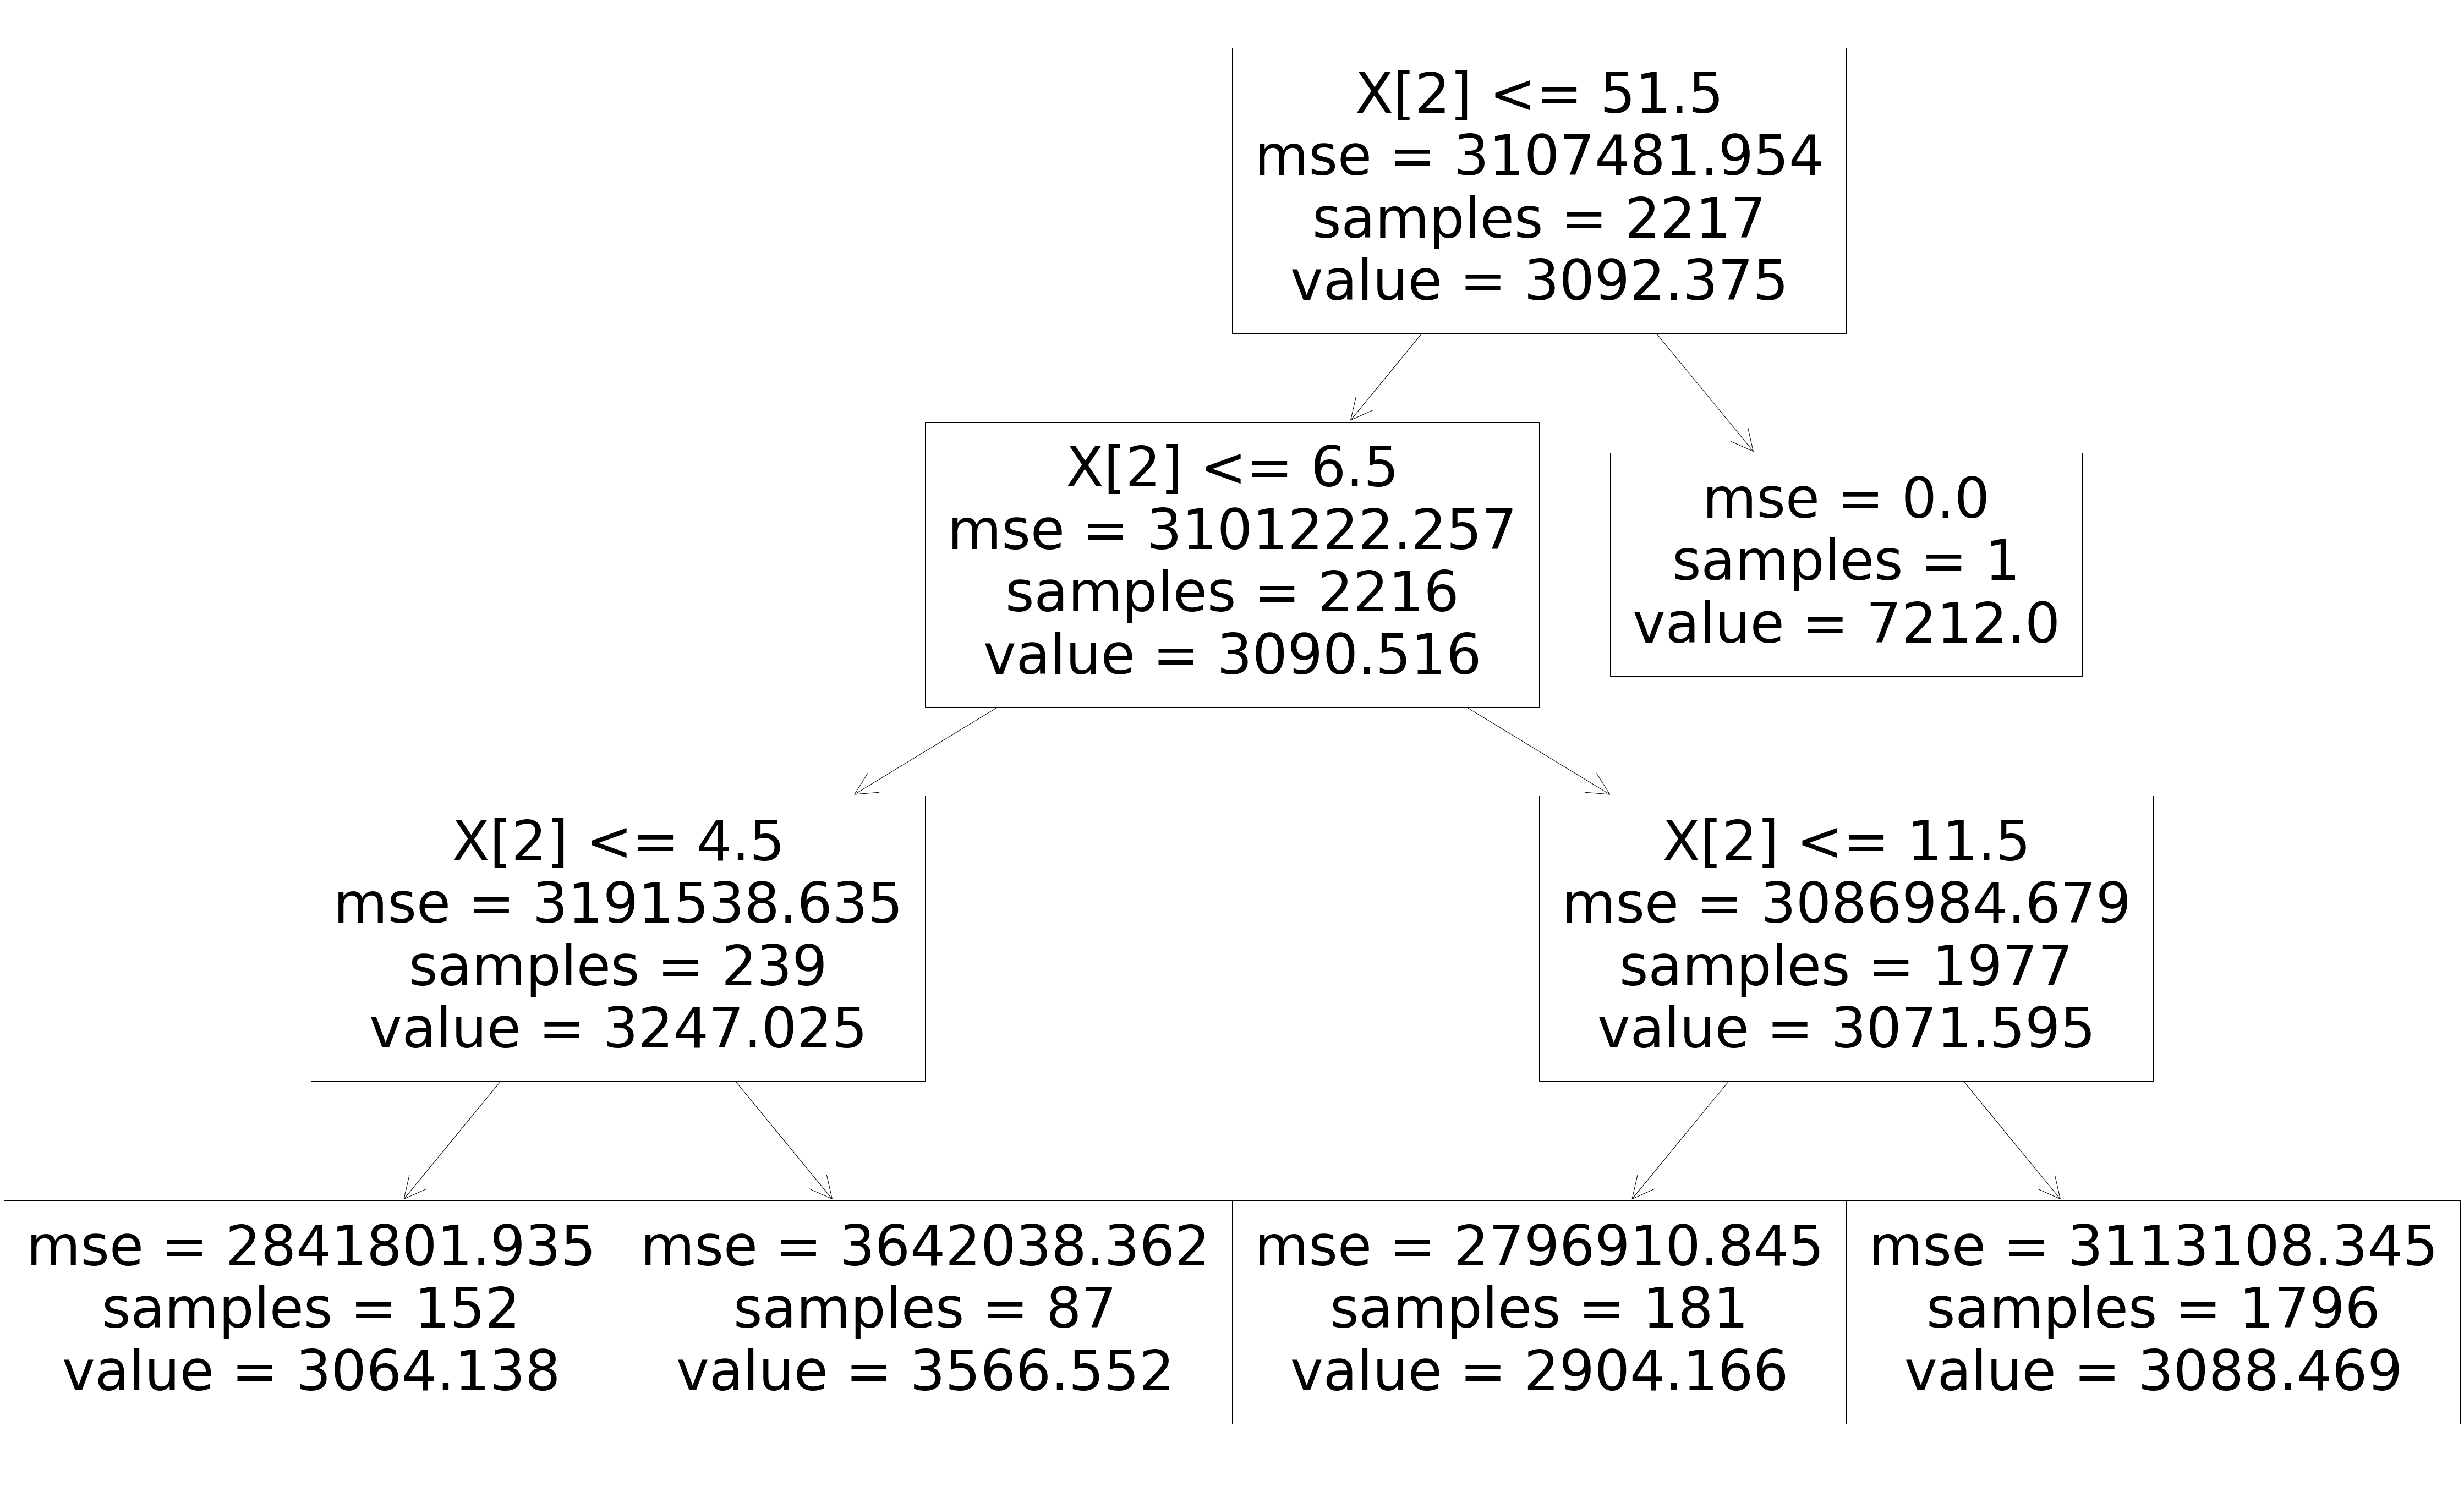

In [149]:
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 80,50

tree.plot_tree(regressor);

In [150]:
yhat = regressor.predict(X_test)

In [151]:
y_test=y_test.reset_index(drop=True)
y_test.T

,0,1,2,3,4,5,6,7,8,9,...,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193
3_year_product_profit,2211,2068,4534,2434,1830,1732,2037,3899,4955,3936,...,2011,3328,353,993,3568,2807,3512,1907,2394,2169


In [152]:
yhat=pd.DataFrame(yhat)
yhat.T

,0,1,2,3,4,5,6,7,8,9,...,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193
0,3064.138158,3088.46882,3566.551724,3088.46882,3088.46882,3566.551724,3088.46882,3088.46882,3088.46882,3088.46882,...,3088.46882,3088.46882,3088.46882,3088.46882,3088.46882,2904.165746,3088.46882,3088.46882,3566.551724,3088.46882


In [153]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yhat))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, yhat))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat)))

Mean Absolute Error: 1410.558399977307
Mean Squared Error: 3189161.912598115
Root Mean Squared Error: 1785.8224751072305


In [154]:
evaluation_data=[round(metrics.mean_absolute_error(y_test, yhat),3),round(metrics.mean_squared_error(y_test, yhat),3),round(np.sqrt(metrics.mean_squared_error(y_test, yhat)),3)]
evaluation_data=pd.DataFrame(evaluation_data,index=['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error'],columns=['Score'])
evaluation_data

,Score
Mean Absolute Error,1410.558
Mean Squared Error,3189161.913
Root Mean Squared Error,1785.822


                               Score
Mean Absolute Error         1410.558
Mean Squared Error       3189161.913
Root Mean Squared Error     1785.822


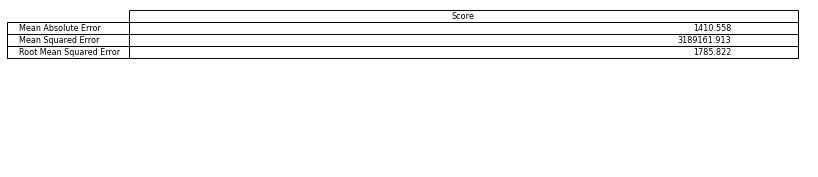

In [155]:
df = evaluation_data
print(evaluation_data)

# set fig size
fig, ax = plt.subplots(figsize=(12, 3)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
tab = table(ax, df, loc='upper right')  
# set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(8) 
# save the result
plt.savefig('Evaluation Scores.png')

In [156]:
# Mean is 3120 with a STD of 1770
((metrics.mean_absolute_error(y_test, yhat)) / profits_mean) * 100

45.206283700108244

45% of mean with a standard deviation of +/-1

In [157]:
important_features=pd.DataFrame(regressor.feature_importances_,index=X_2.columns,columns=['Feature Importance']).sort_values(by=['Feature Importance'],ascending=False)
important_features

,Feature Importance
age,1.0
wealth_segment,0.0
property_valuation,0.0


                    Feature Importance
age                                1.0
wealth_segment                     0.0
property_valuation                 0.0


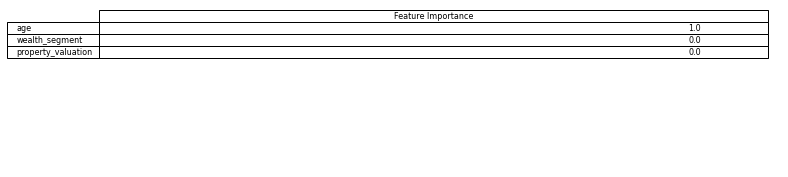

In [158]:
df = important_features
print(important_features)

# set fig size
fig, ax = plt.subplots(figsize=(12, 3)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
tab = table(ax, df, loc='upper right')  
# set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(8) 
# save the result
plt.savefig('Feature Importance Scores.png')

In [159]:
customer_profits

,3_year_product_profit
customer_id,
1,3018.090000
2,2226.260000
3,3362.810000
4,220.570000
5,2394.940000
...,...
3497,1648.320000
3498,3147.330000
3499,4955.250000


In [160]:
# Load new customer dataset into dataframe and drop unneeded columns
X_cust=new_customer_list.drop(columns=['state','gender','tenure','owns_car','job_industry_category','past_3_years_bike_related_purchases'])
# Label encode new customer set
X_cust=[le.fit_transform(X_cust.iloc[:,i]) for i in range(len(X_cust.columns))]
X_cust=pd.DataFrame(X_cust).T
X_cust

,0,1,2
0,2,5,44
1,2,10,32
2,0,4,27
3,0,0,23
4,0,8,36
...,...,...,...
978,0,6,42
979,2,9,0
980,0,1,47
981,2,1,49


In [161]:
y_pred = regressor.predict(X_cust)
predicted_values=pd.DataFrame(y_pred,columns=['predicted 3 year profit'])
predicted_values

,predicted 3 year profit
0,3088.468820
1,3088.468820
2,3088.468820
3,3088.468820
4,3088.468820
...,...
978,3088.468820
979,3064.138158
980,3088.468820
981,3088.468820


In [162]:
current_customer_list=pd.read_excel('Sprocket Central Data - KPMG.xlsx',sheet_name='NewCustomerList',skiprows=1).reset_index(drop=True)
current_customer_list

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.09,1.3625,1.362500,1.158125,997,997,0.357000


In [163]:
current_customer_list=current_customer_list.merge(predicted_values, left_index=True, right_index=True)
current_customer_list

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,predicted 3 year profit
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750,3088.468820
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750,3088.468820
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750,3088.468820
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125,3088.468820
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125,3088.468820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,Artemis,Swanson,Male,77,1977-02-12,Web Designer II,Argiculture,Mass Customer,N,Yes,...,Australia,5,0.84,1.0500,1.0500,0.892500,979,979,0.416500,3088.468820
979,Daryle,Marginson,Male,93,1986-06-27,Environmental Tech,Argiculture,Mass Customer,N,Yes,...,Australia,12,0.44,0.5500,0.6875,0.584375,979,979,0.416500,3064.138158
980,Tyne,Anshell,Female,71,1992-04-08,Mechanical Systems Engineer,NaN,Mass Customer,N,Yes,...,Australia,8,0.51,0.6375,0.6375,0.541875,979,979,0.416500,3088.468820
981,Leona,Shorrock,Female,83,1951-08-23,Senior Quality Engineer,Financial Services,Affluent Customer,N,Yes,...,Australia,1,0.44,0.5500,0.6875,0.687500,979,979,0.416500,3088.468820


In [164]:
predicted_customer_list=current_customer_list.sort_values(by='predicted 3 year profit',ascending=False)
predicted_customer_list

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,predicted 3 year profit
233,Deborah,Petrovsky,Female,53,1943-07-14,Teacher,Property,Mass Customer,N,No,...,Australia,7,0.73,0.7300,0.73000,0.620500,233,233,1.10000,7212.000000
404,Leese,Huckleby,Female,67,1977-09-10,Help Desk Operator,Manufacturing,High Net Worth,N,Yes,...,Australia,7,0.47,0.5875,0.58750,0.587500,405,405,0.93000,7212.000000
231,Danny,Bodle,Male,50,1943-09-24,Statistician I,Manufacturing,Mass Customer,N,Yes,...,Australia,9,0.40,0.5000,0.62500,0.531250,231,231,1.10500,7212.000000
866,Clarine,Piecha,Female,99,1964-12-07,Dental Hygienist,Health,High Net Worth,N,No,...,Australia,10,1.01,1.0100,1.26250,1.262500,865,865,0.55000,7212.000000
110,Franciska,Stigell,Female,95,1968-11-15,Food Chemist,Health,Mass Customer,N,Yes,...,Australia,7,0.50,0.6250,0.78125,0.664062,111,111,1.28125,7212.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,Laurel,Devennie,Female,78,1976-09-25,VP Product Management,Manufacturing,Affluent Customer,N,No,...,Australia,5,0.66,0.6600,0.66000,0.660000,536,536,0.82500,2904.165746
443,Gleda,Howerd,Female,59,1964-01-22,Senior Developer,IT,Mass Customer,N,No,...,Australia,2,0.75,0.7500,0.75000,0.637500,444,444,0.90000,2904.165746
650,Gordon,Rewan,Male,42,1988-01-07,Chief Design Engineer,NaN,Mass Customer,N,No,...,Australia,8,0.98,0.9800,0.98000,0.833000,651,651,0.72250,2904.165746
135,Padraig,Snel,Male,89,1970-11-08,Staff Accountant II,NaN,Mass Customer,N,No,...,Australia,7,0.95,0.9500,1.18750,1.009375,133,133,1.23750,2904.165746


In [165]:
predicted_customer_list.to_csv('predicted profits customer list.csv',index=False)